/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


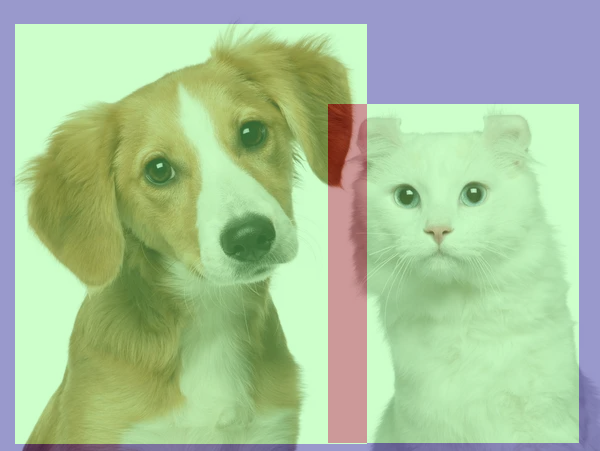

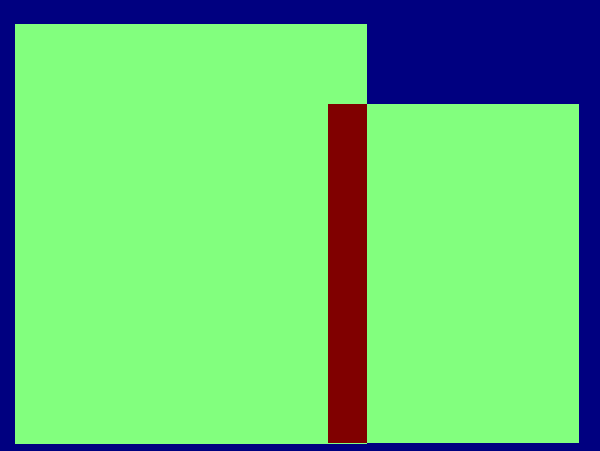

In [3]:
# Import required libraries
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import the necessary patch for displaying images in Colab
from google.colab.patches import cv2_imshow

# Load the pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define COCO class labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Function to detect objects and generate a heatmap
def detect_objects_with_heatmap(image_path, confidence_threshold=0.5):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found at {image_path}")
        return None, None

    original_image = image.copy()

    # Convert the image to a tensor
    image_tensor = F.to_tensor(image)

    # Perform inference
    with torch.no_grad():
        predictions = model([image_tensor])

    boxes = predictions[0]['boxes'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    # Create a blank heatmap with the same dimensions as the image
    heatmap = np.zeros((image.shape[0], image.shape[1]), dtype=np.float32)

    for i, box in enumerate(boxes):
        if scores[i] > confidence_threshold:
            x1, y1, x2, y2 = box.astype(int)
            # Increment the heatmap intensity in the region of the bounding box
            heatmap[y1:y2, x1:x2] += 1

    # Normalize the heatmap to the range [0, 255]
    heatmap = cv2.normalize(heatmap, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Apply a colormap to the heatmap
    heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Blend the heatmap with the original image
    blended_image = cv2.addWeighted(original_image, 0.6, heatmap_colored, 0.4, 0)

    return blended_image, heatmap_colored

# Main code to run the function
if __name__ == "__main__":
    # Replace with your image path
    IMAGE_PATH = "/content/dogcat.jpg"

    # Detect objects and generate heatmap
    blended_image, heatmap = detect_objects_with_heatmap(IMAGE_PATH, confidence_threshold=0.5)

    if blended_image is not None:
        # Display the blended image with heatmap using cv2_imshow
        cv2_imshow(blended_image)
        cv2_imshow(heatmap)

        # Optionally save the images
        cv2.imwrite("output_blended_image.jpg", blended_image)
        cv2.imwrite("output_heatmap.jpg", heatmap)

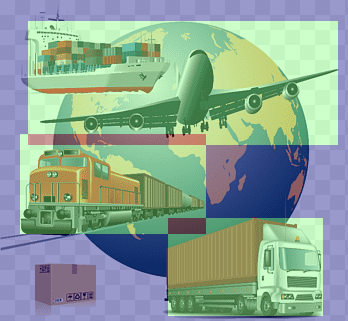

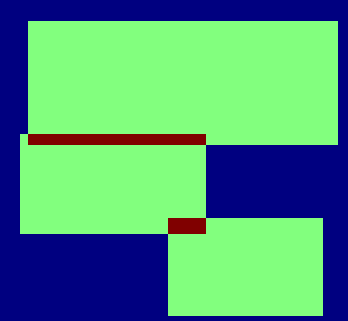

In [4]:
if __name__ == "__main__":
    # Replace with your image path
    IMAGE_PATH = "/content/transport.png"

    # Detect objects and generate heatmap
    blended_image, heatmap = detect_objects_with_heatmap(IMAGE_PATH, confidence_threshold=0.5)

    if blended_image is not None:
        # Display the blended image with heatmap using cv2_imshow
        cv2_imshow(blended_image)
        cv2_imshow(heatmap)

        # Optionally save the images
        cv2.imwrite("output_blended_image.jpg", blended_image)
        cv2.imwrite("output_heatmap.jpg", heatmap)